<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/butterfly_classification%26reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [42]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX_cnn = trainX
trainY_cnn = trainY
testX_cnn = testX
testY_cnn = testY
trainX_cnn = trainX_cnn.reshape(trainX_cnn.shape[0], 28, 28, 1)
testX_cnn = testX_cnn.reshape(testX_cnn.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
trainX_cnn = trainX_cnn.astype("float32") / 255.0
testX_cnn = testX_cnn.astype("float32") / 255.0

trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
testX1=testX
trainX1=trainX
trainY1=trainY
testY1=testY
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)
input_1 = (trainX[:,:14,:])
input_2 = (trainX[:,14:28,:])
input_test_1 = (testX[:,:14,:])
input_test_2 = (testX[:,14:28,:])

In [43]:
testY1.shape

(10000,)

In [44]:
def build_model_1(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(198,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [45]:
def build_model_2(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(198,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [46]:
def build_model_3(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(32,activation = 'relu'),
    Dense(32,activation = 'relu'),
	])
	return model

In [47]:
def build_model_4(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
		Dense(48,activation = 'relu'),
    Dense(64,activation = 'relu')
	])
	return model

In [48]:
def build_model_5(width, height, classes):
	inputShape = (width,height)
	model = Sequential([Flatten(input_shape=inputShape),
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(10, activation="softmax")
          ])
	return model

In [49]:
def build_model_6(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu'),
		Dense(classes, activation= "sigmoid")#"softmax")
	])
	return model

In [50]:
EPOCHS = 10
BS = 32
INIT_LR = 1e-2
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_2(14,28,1)
model3= build_model_3(64,1,32)
model4= build_model_4(32,1,64)
model5= build_model_5(64,1,784)
model6= build_model_6(64,1,784)
opt = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# Adam(
#     learning_rate=INIT_LR,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name='Adam',
#     # **kwargs
# )
# Adam(learning_rate=INIT_LR)# decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [51]:
model1.summary()
# model2.summary()
# model3.summary()
# model4.summary()
model5.summary()
model6.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 392)               0         
                                                                 
 dense_39 (Dense)            (None, 198)               77814     
                                                                 
 dense_40 (Dense)            (None, 64)                12736     
                                                                 
Total params: 90,550
Trainable params: 90,550
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 64)                0         
                                                                 
 dense_47 (Dense)         

In [52]:
#pred1 = model1(input_1[0:32])

In [53]:
#pred1

In [54]:
def step(X1,X2,y,y1):
    
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)

      pred1_A, pred1_B =tf.split(pred1,num_or_size_splits=2,axis=1)
      pred2_A, pred2_B =tf.split(pred2,num_or_size_splits=2,axis=1)

      X3 = tf.keras.layers.concatenate([pred1_B,pred2_A])
      pred3 = model3(X3)
      pred4 = model4(pred3)

      pred4_A, pred4_B =tf.split(pred4,num_or_size_splits=2,axis=1)

      X4 = tf.keras.layers.concatenate([pred1_A,pred4_A])
      X5 = tf.keras.layers.concatenate([pred4_B,pred2_B])

      pred5 = model5(X4)
      pred6 = model6(X5)
    
      loss5 =sparse_categorical_crossentropy(y1, pred5)
      # loss5 = binary_crossentropy(y, pred5)
      loss6 = binary_crossentropy(y, pred6)

      #print(loss5.shape)

    # grads6_5 = tape.gradient(loss6, model5.trainable_variables)
    #print("grads6_5 length is = ",grads6_5)
    grads6 = tape.gradient(loss6, model6.trainable_variables)#------------------------------
    #print("grads6_5 length is = ",grads6)
    grads5 = tape.gradient(loss5, model5.trainable_variables)#------------------------------

    # print()
    # print("grads6 length is = ",len(grads6))
    # print("grads6 type is = ",type(grads6))
    # print("grad6[0].shape = ",grads6[0].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[1].shape = ",grads6[1].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[2].shape = ",grads6[2].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    # print("grad6[3].shape = ",grads6[3].shape)
    # print("grads6[0] type is = ",type(grads6[0]))
    #print(model5.trainable_variables[1])
    grads4 = tape.gradient([loss5,loss6], model4.trainable_variables)#------------------------------
    grads3 = tape.gradient([loss5,loss6], model3.trainable_variables)#------------------------------
    # #print(len(grads3))
    grads2 = tape.gradient([loss5,loss6], model2.trainable_variables)#------------------------------
    grads1 = tape.gradient([loss5,loss6], model1.trainable_variables)#------------------------------
    # #grads1 = tape.gradient(grads3[:int(len(grads3)/2)], model1.trainable_variables)
    # #grads2 = tape.gradient(grads3[int(len(grads3)/2):], model2.trainable_variables)
    
    # #print("loss is = ",grads1)
    
    #grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads6, model6.trainable_variables))#------------------------------
    opt.apply_gradients(zip(grads5, model5.trainable_variables))#------------------------------

    #print("ZZZ",opt.apply_gradients(zip(grads5, model5.trainable_variables)))
    opt.apply_gradients(zip(grads4, model4.trainable_variables)) 
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables))
    opt.apply_gradients(zip(grads1, model1.trainable_variables)) 
    loss_sum1=[]
    loss_sum2=[]
    loss_sum6 = sum(loss6)
    loss_sum5 = sum(loss5)
    return loss_sum6,loss_sum5

In [ ]:
# numUpdates = 5
numUpdates = int(trainX.shape[0] / BS)
tot_loss6=[]
tot_loss5=[]

for epoch in range(0, EPOCHS):
  print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
  sys.stdout.flush()
  epochStart = time.time()
  loss_epoch6 = 0
  loss_epoch5 = 0
  for i in range(0, numUpdates):
    start = i * BS
    end = start + BS
    #print("inp_1 = ",input_1[start:end])
    #print("inp_2 = ",input_2[start:end])
    #print("epoch and i is = ",epoch,i)
    # step(input_1[start:end],input_2[start:end], trainY[start:end])
    loss_each_BS6,loss_each_BS5 = step(input_1[start:end],input_2[start:end], trainY[start:end],trainY1[start:end])
    loss_epoch6 += loss_each_BS6
    loss_epoch5 += loss_each_BS5
  tot_loss6.append(int(loss_epoch6)/60000)
  tot_loss5.append(int(loss_epoch5)/60000)
  epochEnd = time.time()
  elapsed = (epochEnd - epochStart) / 60.0
  print("took {:.4} minutes".format(elapsed))
print("tot_loss6 is = ",tot_loss6)
print("tot_loss5 is = ",tot_loss5)

[INFO] starting epoch 1/10...took 4.128 minutes
[INFO] starting epoch 2/10...took 4.101 minutes
[INFO] starting epoch 3/10...took 4.105 minutes
[INFO] starting epoch 4/10...took 4.078 minutes
[INFO] starting epoch 5/10...took 4.081 minutes
[INFO] starting epoch 6/10...took 4.107 minutes
[INFO] starting epoch 7/10...took 4.088 minutes
[INFO] starting epoch 8/10...

# Epoch:**10**

In [65]:
def step1(X1,X2,y,y1):
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)

      pred1_A, pred1_B =tf.split(pred1,num_or_size_splits=2,axis=1)
      pred2_A, pred2_B =tf.split(pred2,num_or_size_splits=2,axis=1)

      X3 = tf.keras.layers.concatenate([pred1_B,pred2_A])
      pred3 = model3(X3)
      pred4 = model4(pred3)

      pred4_A, pred4_B =tf.split(pred4,num_or_size_splits=2,axis=1)

      X4 = tf.keras.layers.concatenate([pred1_A,pred4_A])
      X5 = tf.keras.layers.concatenate([pred4_B,pred2_B])

      pred5 = model5(X4)
      pred6 = model6(X5)

      loss6 = binary_crossentropy(y, pred6)
      # loss5 = binary_crossentropy(y, pred5)
      loss5 =sparse_categorical_crossentropy(y1, pred5)
      #loss_sum6=[]
      #loss_sum5=[]
      loss_sum6 = sum(loss6)
      loss_sum5 = sum(loss5)

      print("test loss6 is = ",int(loss_sum6)/10000)
      print("test loss5 is = ",int(loss_sum5)/10000)
      return pred6,pred5

In [66]:
out6,out5 = step1(input_test_1,input_test_2, testY, testY1)

test loss6 is =  0.1262
test loss5 is =  0.0877


In [67]:
y_pred=np.argmax(out5,axis=1)

In [68]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

# **Epochs-2**

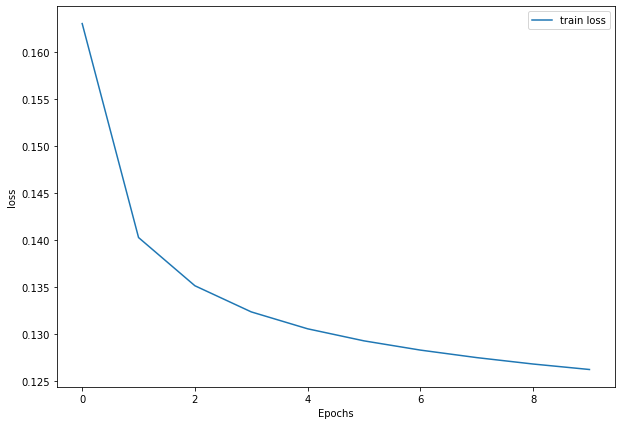

In [69]:
plt.figure(figsize=(10, 7))
plt.plot(tot_loss6)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train loss"])
plt.savefig("loss_6.jpg")

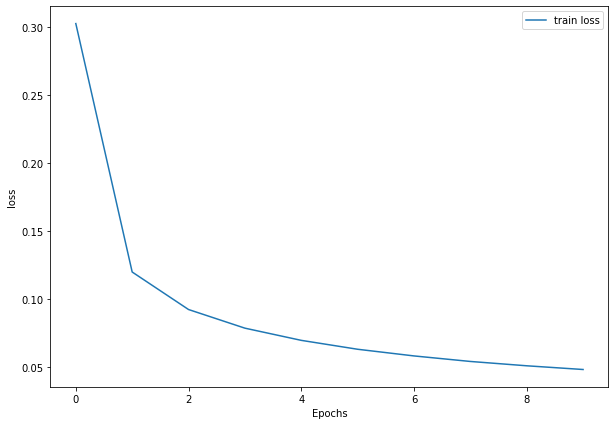

In [70]:
plt.figure(figsize=(10, 7))
plt.plot(tot_loss5)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["train loss"])
plt.savefig("loss_5.jpg")

In [71]:
class_names = ["zero","one", "two", "three", "four", "five",
"six", "seven", "eight", "nine"]

In [72]:
y_pred1 = np.array(class_names)[y_pred]

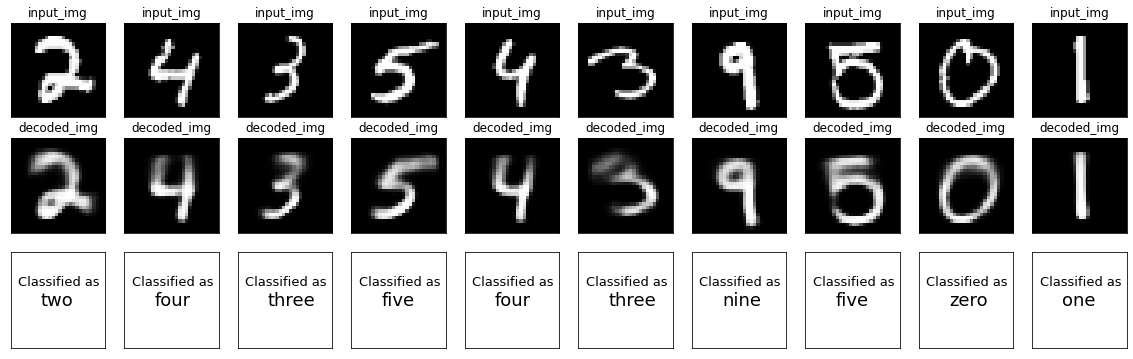

In [125]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("decoded_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.08,0.65,"Classified as " , fontsize=13)
  plt.text(0.32,0.45,y_pred1[i+2679], fontsize=18)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("clas_re_10.png")
plt.show()

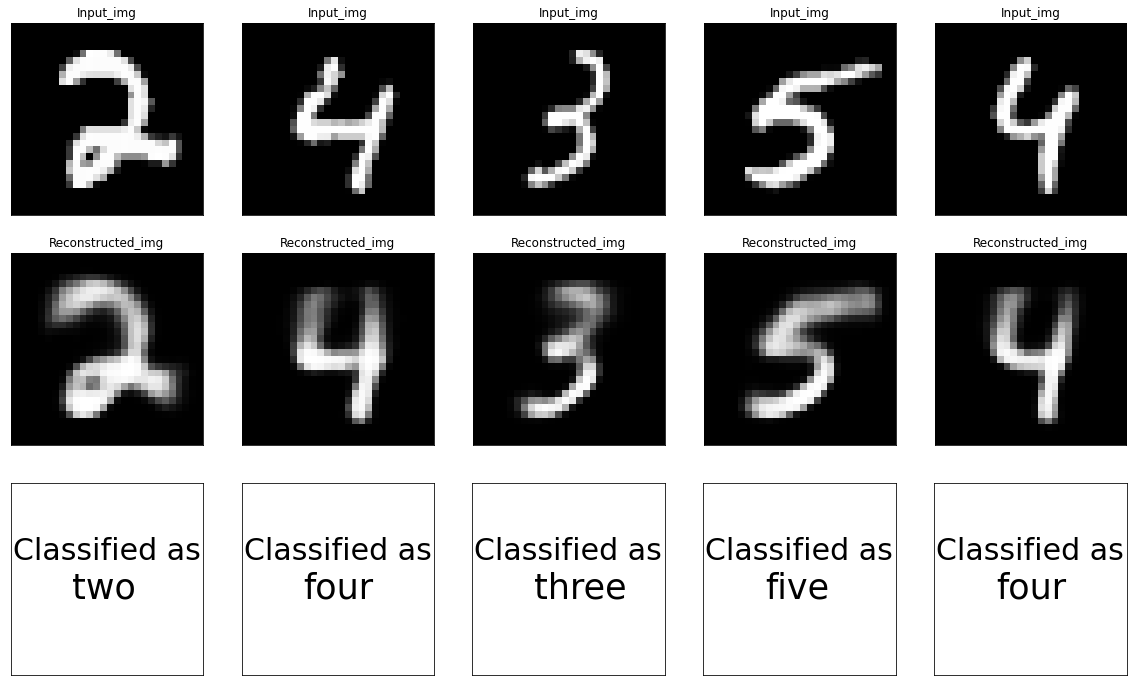

In [124]:
n = 5
plt.figure(figsize=(20, 12))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  predictd_output = tf.reshape(out6[i+2679],[28,28])
  # predictd_output1 = tf.reshape(out5[i],[28,28])
  input_given = tf.reshape(testY[i+2679],[28,28])
  plt.imshow(input_given)
  plt.title("Input_img")
  plt.gray()

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(predictd_output)
  plt.title("Reconstructed_img")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, n, i + 1 + 2*n)
  # plt.imshow()
  # plt.title(y_pred1[i+2679])
  plt.text(0.01,0.6,"Classified as " , fontsize=30)
  plt.text(0.32,0.4,y_pred1[i+2679], fontsize=35)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("cla_re_5.png")
plt.show()